# This code is a simple introduction to Cpx-Liquid melt matching
- for a more advanced example, see Cpx_MeltMatch2_ScruggsPutirka
- This notebook recreates the method of Gleeson et al. (2020) - JPET - https://doi.org/10.1093/petrology/egaa094

## This imports all the python things you need

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..") # This allows you to put the python file in the folder above. So you can have lots of sub folders
import matplotlib.pyplot as plt
import Thermobar as pt

## This sets plotting parameters

In [2]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels



# Loading in Data
- In this case, Gleson et al had cpxs in the sheet "cpxs" and melts in the "melts"
- You column headings need to be "Sample_ID", "SiO2_Liq", "MgO_Cpx" etc. e.g., oxide, then underscore, capital letter for phase

In [3]:
# Loading Liquids
out=pt.import_excel('mn_cp_all_endings.xlsx', sheet_name="WR")
my_input_Liqs=out['my_input']
myLiquids1=out['Liqs']

out2=pt.import_excel('mn_cp_all_endings.xlsx', sheet_name="tenerife_cp_all")
my_input_Cpxs=out2['my_input']
myCPXs1=out2['Cpxs']




In [4]:
myCPXs1

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.60,0.53,2.79,4.30,0.07,16.04,24.08,0.15,0,0.30,CF195-GCPX-93_core2
1,48.96,0.78,4.53,6.21,0.14,14.17,23.30,0.12,0,0.02,CF195_GPX_21-rim1
2,49.87,0.73,3.90,4.97,0.08,14.94,23.69,0.14,0,0.00,CF195_GPX_21-rim2
3,50.18,0.63,3.01,8.01,0.33,13.56,23.18,0.43,0,0.12,CF195-GCPX-93_rim2
4,48.99,0.64,4.47,8.00,0.16,13.45,23.66,0.16,0,0.00,CF195-GCPX-111_core1
...,...,...,...,...,...,...,...,...,...,...,...
139,50.67,0.48,2.95,3.95,0.06,16.07,23.19,0.11,0,0.18,CF195_CPX_252-m1
140,51.66,0.39,2.17,3.79,0.09,16.44,23.36,0.10,0,0.14,CF195_CPX_252-m2
141,51.53,0.41,2.38,3.81,0.09,16.05,23.25,0.08,0,0.16,CF195_CPX_252-m3
142,50.41,0.58,3.20,5.49,0.14,15.11,22.53,0.11,0,0.00,CF195_CPX_252-core1


In [5]:
# You can check inputs have read in right using .head()
display(myLiquids1.head())
display(myCPXs1.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,60.76,0.42,19.09,3.05,0.27,0.23,1.89,7.09,7.17,0,0.03,0.0,0.0,0,0.0,0.0,0
1,60.77,0.43,19.39,3.05,0.27,0.24,1.94,6.82,7.08,0,0.02,0.0,0.0,0,0.0,0.0,1
2,63.71,0.31,19.91,1.63,0.07,0.12,1.55,6.67,6.04,0,0.01,0.0,0.0,0,0.0,0.0,2
3,58.87,0.44,19.89,2.92,0.22,0.32,1.97,7.21,7.19,0,0.04,0.0,0.0,0,0.0,0.0,3
4,58.86,0.43,19.99,2.93,0.22,0.29,1.92,7.15,7.17,0,0.04,0.0,0.0,0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.60,0.53,2.79,4.30,0.07,16.04,24.08,0.15,0,0.30,CF195-GCPX-93_core2
1,48.96,0.78,4.53,6.21,0.14,14.17,23.30,0.12,0,0.02,CF195_GPX_21-rim1
2,49.87,0.73,3.90,4.97,0.08,14.94,23.69,0.14,0,0.00,CF195_GPX_21-rim2
3,50.18,0.63,3.01,8.01,0.33,13.56,23.18,0.43,0,0.12,CF195-GCPX-93_rim2
4,48.99,0.64,4.47,8.00,0.16,13.45,23.66,0.16,0,0.00,CF195-GCPX-111_core1


# Melt matching function
- Initially, we use the default, where all equilibrium criteria are considered, and specify the H2O content of the liquid is 0.5. 

In [6]:
melt_match_out=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012", KdMatch="Masotta",
KdErr=0.05,   Fe3Fet_Liq=0.0, sigma=2)

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering 16704 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
171 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [7]:
Avs=melt_match_out['Av_PTs']
rims=Avs.loc[Avs['Sample_ID_Cpx'].str.contains('rim')]
cores=Avs.loc[Avs['Sample_ID_Cpx'].str.contains('core')]

In [8]:
Avs

,No. of liquids averaged,Sample_ID_Cpx,Mean_T_K_calc,st_dev_T_K_calc,Mean_P_kbar_calc,st_dev_P_kbar_calc,Mean_Delta_Kd_Put2008,Mean_Delta_Kd_Mas2013,Mean_Delta_EnFs,Mean_Delta_CaTs,...,Mean_Mgno_Liq_Fe2,Mean_DeltaFeMg_WB,Mean_T_Liq_MinP,Mean_T_Liq_MaxP,Mean_Kd_Ideal_Put,Mean_Kd_Ideal_Masotta,Mean_DiHd_Pred_Mollo,Mean_EnFs_Pred_Mollo,Mean_CaTs_Pred_P1999,Mean_CrCaTS_Pred_P1999
0,3,CF195-GCPX-93_rim2,1291.787467,5.031104,1.564923,0.250724,0.021977,0.023702,0.005624,0.003869,...,0.425534,0.021144,1291.787467,1291.787467,0.237469,0.253388,0.832506,0.072905,0.003869,0.0
0,2,CF195-GCPX-111_core1,1304.725343,6.942578,0.862790,0.026754,0.022137,0.008959,0.012108,0.028484,...,0.440131,0.016263,1304.725343,1304.725343,0.240623,0.253801,0.831085,0.085013,0.004383,0.0
0,3,CF195-GCPX-111_core2,1297.339845,4.924219,0.957404,0.265774,0.025259,0.026676,0.013670,0.024821,...,0.425534,0.022669,1297.339845,1297.339845,0.238825,0.255967,0.834273,0.079184,0.004148,0.0
0,3,CF195-GCPX-111_core3,1297.813600,4.916990,0.961043,0.266878,0.025864,0.027253,0.013935,0.025282,...,0.425534,0.023382,1297.813600,1297.813600,0.238941,0.256187,0.833351,0.080650,0.004237,0.0
0,2,CF195_GPX_21-core2,1312.914612,7.867718,0.977417,0.021121,0.013114,0.023925,0.017941,0.033159,...,0.440131,0.018817,1312.914612,1312.914612,0.242608,0.257551,0.821081,0.092415,0.004846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3,CF195-CPX-185_rim2,1292.712681,4.974470,1.906521,0.255171,0.025939,0.027619,0.006439,0.009971,...,0.425534,0.023025,1292.712681,1292.712681,0.237695,0.253818,0.825192,0.080866,0.004422,0.0
0,3,CF195-CPX-185_rim3,1290.298824,4.981014,2.079775,0.250775,0.024276,0.026097,0.007165,0.002901,...,0.425534,0.020960,1290.298824,1290.298824,0.237105,0.252698,0.827737,0.075803,0.004135,0.0
0,3,CF195_CPX_138-rim1,1292.788188,5.186336,2.018161,0.246466,0.021508,0.023142,0.003021,0.000343,...,0.425534,0.021402,1292.788188,1292.788188,0.237714,0.253853,0.823242,0.077495,0.004230,0.0
0,3,CF195_CPX_138-rim2,1289.871409,4.859636,1.861542,0.254763,0.025798,0.027668,0.002899,0.004052,...,0.425534,0.022587,1289.871409,1289.871409,0.237000,0.252500,0.829306,0.075059,0.004052,0.0


Text(0, 0.5, '#')

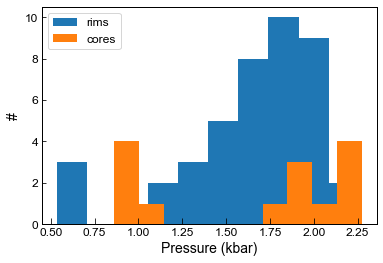

In [9]:
plt.hist(rims['Mean_P_kbar_calc'], label='rims')
plt.hist(cores['Mean_P_kbar_calc'], label='cores')
plt.legend()
plt.xlabel('Pressure (kbar)')
plt.ylabel('#')

KstestResult(statistic=0.2857142857142857, pvalue=0.3310967002469194)


# 5 wt " H2O"

In [10]:
melt_match_out_5=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012", KdMatch="Masotta",
KdErr=0.05,   Fe3Fet_Liq=0.0, sigma=2, H2O_Liq=5)

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering 16704 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
203 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [11]:
Avs5=melt_match_out_5['Av_PTs']
rims5=Avs5.loc[Avs5['Sample_ID_Cpx'].str.contains('rim')]
cores5=Avs5.loc[Avs5['Sample_ID_Cpx'].str.contains('core')]

Text(0, 0.5, '#')

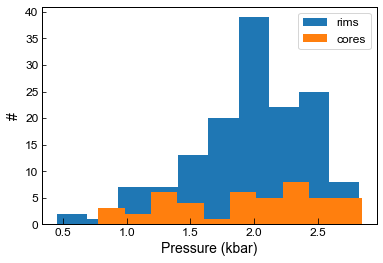

In [12]:
All5=melt_match_out_5['All_PTs']
rims5All=All5.loc[All5['Sample_ID_Cpx'].str.contains('rim')]
cores5All=All5.loc[All5['Sample_ID_Cpx'].str.contains('core')]
plt.hist(rims5All['P_kbar_calc'], label='rims')
plt.hist(cores5All['P_kbar_calc'], label='cores')
plt.legend()
plt.xlabel('Pressure (kbar)')
plt.ylabel('#')

In [13]:
cores5

,No. of liquids averaged,Sample_ID_Cpx,Mean_T_K_calc,st_dev_T_K_calc,Mean_P_kbar_calc,st_dev_P_kbar_calc,Mean_Delta_Kd_Put2008,Mean_Delta_Kd_Mas2013,Mean_Delta_EnFs,Mean_Delta_CaTs,...,Mean_Mgno_Liq_Fe2,Mean_DeltaFeMg_WB,Mean_T_Liq_MinP,Mean_T_Liq_MaxP,Mean_Kd_Ideal_Put,Mean_Kd_Ideal_Masotta,Mean_DiHd_Pred_Mollo,Mean_EnFs_Pred_Mollo,Mean_CaTs_Pred_P1999,Mean_CrCaTS_Pred_P1999
0,3,CF195-GCPX-111_core1,1272.518904,4.982364,1.080464,0.264766,0.024243,0.027098,0.005613,0.028734,...,0.425534,0.020637,1272.518904,1272.518904,0.232732,0.244472,0.856568,0.078518,0.004132,0.0
0,4,CF195-GCPX-111_core2,1266.749294,3.870985,1.216780,0.310115,0.026149,0.035722,0.009253,0.025118,...,0.414088,0.026286,1266.749294,1266.749294,0.231305,0.246272,0.860663,0.074767,0.003851,0.0
0,4,CF195-GCPX-111_core3,1267.204717,3.866489,1.219874,0.311523,0.026312,0.035895,0.009471,0.025583,...,0.414088,0.026447,1267.204717,1267.204717,0.231417,0.246486,0.859704,0.076186,0.003935,0.0
0,2,CF195_GPX_21-core2,1281.311203,7.493513,1.347563,0.021121,0.013157,0.009556,0.012151,0.033432,...,0.440131,0.018817,1281.311203,1281.311203,0.234898,0.243181,0.849281,0.086625,0.004574,0.0
0,4,CF195_CPX_50-core1,1260.646283,3.868607,2.206177,0.280499,0.026060,0.035508,0.003103,0.003483,...,0.414088,0.026211,1260.646283,1260.646283,0.229790,0.243412,0.853406,0.072876,0.003902,0.0
0,4,CF195_CPX_50-core2,1257.478740,3.817272,2.553620,0.271723,0.026035,0.035439,0.002906,0.002260,...,0.414088,0.026171,1257.478740,1257.478740,0.229002,0.241931,0.853749,0.068860,0.003711,0.0
0,3,CF195-CPX-85_core1,1254.278973,2.630161,2.070656,0.267189,0.017815,0.031330,0.002566,0.003619,...,0.400319,0.018740,1254.278973,1254.278973,0.228205,0.239452,0.861768,0.066531,0.003619,0.0
0,4,CF195_CPX_50-core3,1258.495978,3.708301,2.259234,0.288489,0.029407,0.036581,0.003910,0.008199,...,0.414088,0.027204,1258.495978,1258.495978,0.229255,0.242409,0.856141,0.072764,0.003905,0.0
0,2,CF195-CPX-85_core3,1254.978468,2.141614,1.834754,0.075798,0.008524,0.016935,0.002247,0.003576,...,0.388045,0.011671,1254.978468,1254.978468,0.228380,0.250252,0.855721,0.068359,0.003576,0.0
0,2,CF195-CPX-85_core4,1282.248651,7.647903,1.382605,0.019139,0.012751,0.016109,0.007066,0.026685,...,0.440131,0.025809,1282.248651,1282.248651,0.235129,0.243608,0.845849,0.086699,0.004585,0.0


Text(0, 0.5, '#')

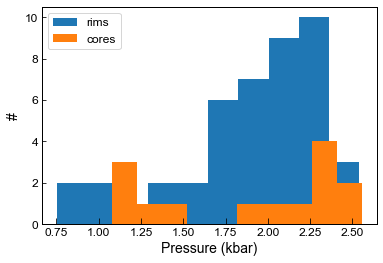

In [14]:
plt.hist(rims5['Mean_P_kbar_calc'], label='rims')
plt.hist(cores5['Mean_P_kbar_calc'], label='cores')
plt.legend()
plt.xlabel('Pressure (kbar)')
plt.ylabel('#')

Text(0, 0.5, '#')

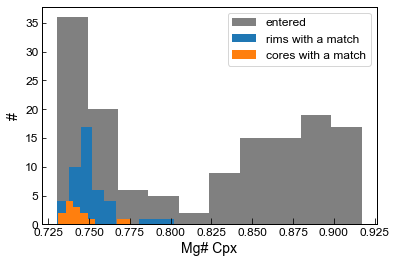

In [49]:
cpx_comp=pt.calculate_clinopyroxene_components(cpx_comps=myCPXs1)
plt.hist(cpx_comp['Mgno_CPX'], color='grey', label='entered')
plt.hist(rims5['Mean_Mgno_CPX'], label='rims with a match')
plt.hist(cores5['Mean_Mgno_CPX'], label='cores with a match')
plt.legend()
plt.xlabel('Mg# Cpx')
plt.ylabel('#')

In [15]:
from scipy import stats
test_M_L=stats.ks_2samp(rims5['Mean_P_kbar_calc'], cores5['Mean_P_kbar_calc'])
print(test_M_L)


KstestResult(statistic=0.2435064935064935, pvalue=0.4796410386021369)


## Are cores and rims matching different liquids?
- No all matches are the same 4 liquids

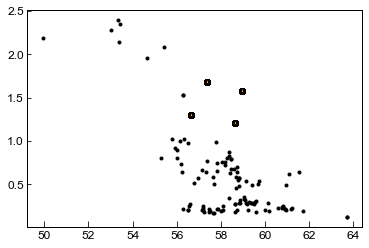

In [52]:
plt.plot(myLiquids1['SiO2_Liq'], myLiquids1['MgO_Liq'], '.k')
plt.plot(rims5All['SiO2_Liq'], rims5All['MgO_Liq'], 'ok', mfc='blue')
plt.plot(cores5All['SiO2_Liq'], cores5All['MgO_Liq'], '*k', mfc='orange')



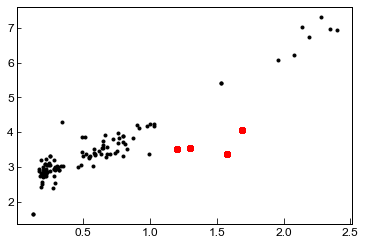

In [53]:
plt.plot(myLiquids1['MgO_Liq'], myLiquids1['FeOt_Liq'], '.k')
plt.plot(rims5All['MgO_Liq'], rims5All['FeOt_Liq'],  'or')


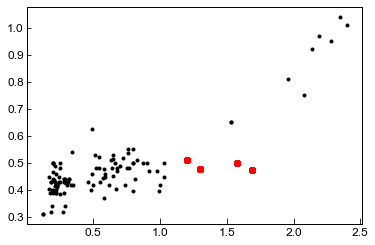

In [54]:
plt.plot(myLiquids1['MgO_Liq'], myLiquids1['TiO2_Liq'], '.k')
plt.plot(rims5All['MgO_Liq'], rims5All['TiO2_Liq'],  'or')


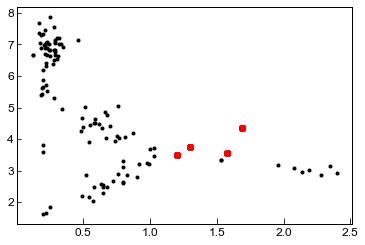

In [41]:
plt.plot(myLiquids1['MgO_Liq'], myLiquids1['Na2O_Liq'], '.k')
plt.plot(rims5All['MgO_Liq'], rims5All['Na2O_Liq'], 'or')


## This is weird, so lets look at all matches, and the distribution of equilibrium tests

In [55]:
melt_match_out_lots=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012", KdMatch="Masotta",
KdErr=1,   Fe3Fet_Liq=0.0, sigma=100, H2O_Liq=5)

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering 16704 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
16704 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [56]:
melt_match_out_lots_all=melt_match_out_lots['All_PTs']

In [23]:
# checking you got them all
len(melt_match_out_lots_all)

16704

## Lets plot a rhodes diagram first

(array([1042., 6014.,  475.,  720., 1486., 1225.,  750., 2290., 2234.,
         468.]),
 array([0.12670362, 0.14739244, 0.16808127, 0.18877009, 0.20945891,
        0.23014774, 0.25083656, 0.27152539, 0.29221421, 0.31290304,
        0.33359186]),
 <BarContainer object of 10 artists>)

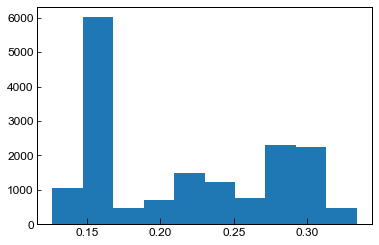

In [29]:
plt.hist(melt_match_out_lots_all['Kd_Ideal_Masotta'])

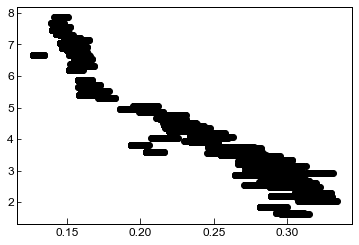

In [31]:
plt.plot(melt_match_out_lots_all['Kd_Ideal_Masotta'], melt_match_out_lots_all['Na2O_Liq'], 'ok')

Text(0, 0.5, 'Mg# Cpx')

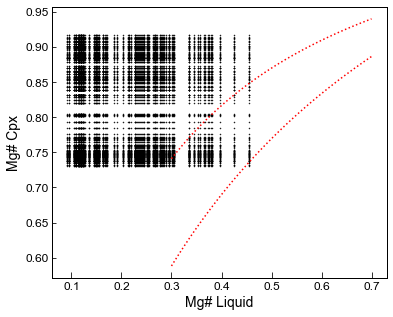

In [58]:
eq_lines_3=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.3, Max_Mgno=0.7, KdMin=0.15, KdMax=0.3)
eq_lines_3.head()
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
#ax1.set_xlim([0.4, 0.7])
#ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_CPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(melt_match_out_lots_all['Mgno_Liq_Fe2'], melt_match_out_lots_all['Mgno_CPX'], '.k',  label="20% Fe3", ms=1)
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMin=0.15)'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMax=0.3)'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlabel('Mg# Liquid')
ax1.set_ylabel('Mg# Cpx')

Text(0.5, 0, 'Delta Kd Masotta')

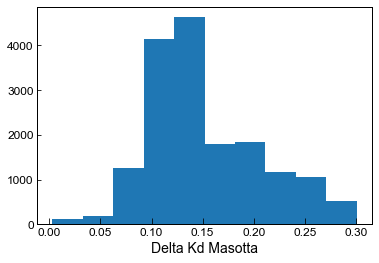

In [24]:
plt.hist(melt_match_out_lots_all['Delta_Kd_Mas2013'])
plt.xlabel('Delta Kd Masotta')

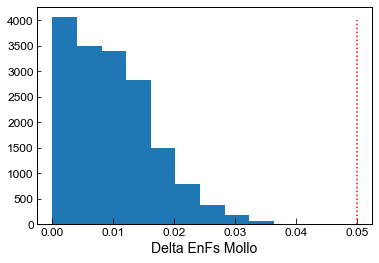

In [68]:
plt.hist(melt_match_out_lots_all['Delta_EnFs'])
plt.xlabel('Delta EnFs Mollo')
plt.plot([0.05, 0.05], [0, 4000], ':r')

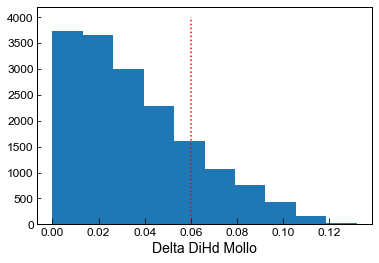

In [69]:
plt.hist(melt_match_out_lots_all['Delta_DiHd'])
plt.xlabel('Delta DiHd Mollo')
plt.plot([0.06, 0.06], [0, 4000], ':r')

In [59]:
help(pt.P_Mas2013_Palk2012)

Help on function P_Mas2013_Palk2012 in module Thermobar.clinopyroxene_thermobarometry:

P_Mas2013_Palk2012(T=None, *, lnK_Jd_liq, H2O_Liq, Na2O_Liq_cat_frac, K2O_Liq_cat_frac, Kd_Fe_Mg_Fet)
    Clinopyroxene-liquid barometer of Masotta et al. (2013) for alkaline melts
    | SEE=+-1.15 kbar



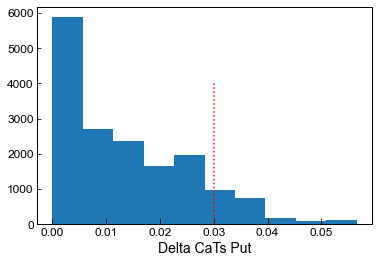

In [70]:
plt.hist(melt_match_out_lots_all['Delta_CaTs'])
plt.xlabel('Delta CaTs Put')
plt.plot([0.03, 0.03], [0, 4000], ':r')

## Clearly, the KD filter is the most restricting... Perhaps set at 0.08, after Putirka

In [71]:
melt_match_out_5_008=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012", KdMatch="Masotta",
KdErr=0.08,   Fe3Fet_Liq=0.0, sigma=2, H2O_Liq=5)

Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering 16704 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
568 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


Text(0, 0.5, '#')

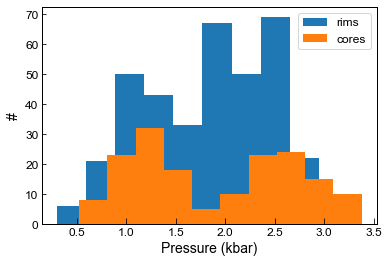

In [72]:
All5_008=melt_match_out_5_008['All_PTs']
rims5All_008=All5_008.loc[All5_008['Sample_ID_Cpx'].str.contains('rim')]
cores5All_008=All5_008.loc[All5_008['Sample_ID_Cpx'].str.contains('core')]
plt.hist(rims5All_008['P_kbar_calc'], label='rims')
plt.hist(cores5All_008['P_kbar_calc'], label='cores')
plt.legend()
plt.xlabel('Pressure (kbar)')
plt.ylabel('#')

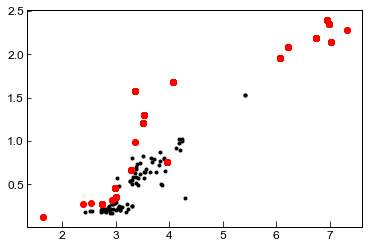

In [74]:
plt.plot(myLiquids1['FeOt_Liq'], myLiquids1['MgO_Liq'], '.k')
plt.plot(rims5All_008['FeOt_Liq'], rims5All_008['MgO_Liq'], 'or')
